In [83]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

In [84]:
X_train.shape


(112, 4)

In [86]:
y_test.shape


(38,)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [5]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [6]:
import numpy as np

In [10]:
x_new = np.array([[7,3.9,2,1.2]])
x_new.shape

(1, 4)

In [11]:
prediction = knn.predict(x_new)
print(prediction)

[0]


In [12]:
print(iris['target_names'][prediction])

['setosa']


In [20]:
y_pred = knn.predict(X_test)
#np.mean(y_pred == y_test)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [29]:
print(y_pred[:-1])

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0]


In [30]:
print(y_test[:-1])

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0]


In [33]:
print(np.mean(y_pred))

0.9210526315789473


In [57]:
print(np.mean(y_pred==y_test))

0.9736842105263158


In [32]:
print(np.mean(y_pred[:-1] == y_test[:-1]))

1.0


In [14]:
knn.score(X_test,y_test)

0.9736842105263158

Ques 1: Briefly explain the way
np.mean(y_pred == y_test)
is computed (see In [11] above). It might help to run its part:
y pred == y test
You may need to make an educated guess.

Answer: 
np.mean gives the mean of the array of number provided, therefore for np.mean(y_pred) would provide the mean for all the values in y_pred array and similary for others.
For the above question, we are trying to find out the mean of numbers where the numbers are similar in both the arrays 'y_pred' and 'y_test'. If we print both the arrays we find the discrepancy in only one number which is the last number thereby it explains the accuracy as we have test set results and we have our predictions for the same, implying that a mean of both the arrays would depict our accuracy which in this case is 97%.

I went further to check the accuracy without the last number which I suspected to be the only discrepancy and found the accuracy to be 100%.


In [164]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
iris['target'], random_state=0)
results = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    #y_pred = knn.score(X_test, y_test)
    #print(np.mean(y_pred == y_test))
    results.append(np.mean(y_pred == y_test))
#print(results)    

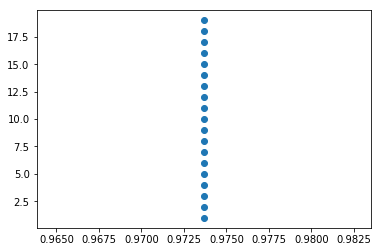

In [165]:
import matplotlib.pyplot as plt
plt.scatter(results,range(1,20))
plt.show()

In [103]:
print(results)

[0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421, 0.02631578947368421]


Question 2: Draw the test error rate of the K Nearest Neighbours algorithm on the
same training set against K. Use the same test set for all K

Answer 2: The plot shows a straight line, as the results array is storing the same value for each test case in n_neighbors which seems wrong.

In [167]:
X1 = np.genfromtxt("C:/Users/bhara/OneDrive/Desktop/iris_data.txt")

In [169]:
Y1 = np.genfromtxt("C:/Users/bhara/OneDrive/Desktop/iris_target.txt")

In [173]:
print(X1.shape); print(X_train.shape)

(150, 4)
(112, 4)


In [174]:
#from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, random_state=0)

In [175]:
print(X1_train.shape)

(112, 4)


In [180]:
print(np.mean(X_test == X1_test))

1.0


In [181]:
print(np.mean(y_test == y1_test))

1.0


Question 3: Check that the dataset that you loaded from file in Section 5 is identical
to the one that you loaded using load_iris in Section 1. You may want
to use your answer to Exercise 1

Answer 3: Both the data sets seem to be identical as the np.mean for all X_train(old) / X1_train(new), y_train(old) / y1_train(new), X_test(old) / X1_test(new), y_test(old) / y1_test(old) are 1.0 which means the accuracy is 100%, thereby the data sets are similar